# Learning From Data Homework 1

https://work.caltech.edu/homework/hw1.pdf

# 1

(i) Not learning, just pure statistics and assumptions

(ii) Supervised learning using a labeled set

(iii) Reinforcement learning

**Answer: \[d\]**

# 2

Most suitable problems for ML: Detecting potential fraud and  determining the optimal cycle for traffic lights in a busy intersection.

(ii) and (iv), **answer A**

# 3

We have 2 opaque bags, each containing 2 balls. One bag has 2 black balls and
the other has a black ball and a white ball. You pick a bag at random and
then pick one of the balls in that bag at random. When you look at the ball,
it is black. You now pick the second ball from that same bag. What is the
probability that this ball is also black?

Answer:

Pick a bag at random. 

A black ball was picked up, meaning that there is a 2/3 chance of being in the blackblack bag and 1/3 of being in the whiteblack bag.

The chance of the other ball being black is then equal to the chance of being in the blackblack bag, so 2/3.

Or using more formal bayesian logic:

P(black|blackblack) = 1  
P(black|whiteblack) = 0.5  
P(blackblack) = 0.5  
P(whiteblack) = 0.5  
P(blackblack|black) = P(black|blackblack)*P(blackblack)/P(black)  
P(whiteblack|black) = P(black|whiteblack)*P(whiteblack)/P(black)

Bayes theorem:

$P(A \cap B) = P(A|B) P(B) = P(B|A)P(A)$

$P(A|B) = P(A\cap B)/P(B) = P(B|A)P(A)/P(B) $

In [13]:
# Thus
P_black = 0.75
P_white = 0.25
P_blackblack = 0.5
P_whiteblack = 0.5
P_black_given_blackblack = 1.0
P_black_given_whiteblack = 0.5
P_blackblack_given_black = P_black_given_blackblack * P_blackblack / P_black
P_whiteblack_given_black = P_black_given_whiteblack * P_whiteblack / P_black

P_second_also_black = P_blackblack_given_black * 1 + P_whiteblack_given_black * 0
P_second_also_black

0.6666666666666666

**Answer: d**

# 4

Consider a sample of 10 marbles drawn from a bin containing red and green marbles.
The probability that any marble we draw is red is µ = 0.55 (independently, with
replacement). We address the probability of getting no red marbles (ν = 0) in the
following cases:

We draw only one such sample. Compute the probability that ν = 0. The
closest answer is (‘closest answer’ means: |your answer−given option| is closest
to 0):

[a] 7.331 × 10−6  
[b] 3.405 × 10−4  
[c] 0.289  
[d] 0.450  
[e] 0.550  

In [3]:
0.45**10

0.00034050628916015635

**answer: b**

# 5

We draw 1,000 independent samples. Compute the probability that (at least)
one of the samples has ν = 0. The closest answer is:

[a] 7.331 × 10−6  
[b] 3.405 × 10−4  
[c] 0.289  
[d] 0.450  
[e] 0.550  

In [10]:
sample_prob = 0.45**10
all_sample_prob = 1 - sample_prob**1000
all_sample_prob

1.0

In [11]:
# probability of one sample having v=0 is 0.45^10
# P(at least one sample has v=0)
# = 1 - P(no samples have v=0)
# P(no samples have v=0)
# = P(sample has v>0)^1000
# P(sample has v>0) = 1 - P(sample has v=0)
P_sample_0 = 0.45**10
1 - (1 - 0.45**10)**1000

0.28863119784980995

**Answer C**

# 6

In [34]:
def bk_funcs():
    for i in range(256):
        yield [int(b) for b in "{:08b}".format(i)]

score_a = 0
score_b = 0
score_c = 0
score_d = 0

for f in bk_funcs():
    # Known data
    if f[0] != 0:
        continue
    if f[1] != 1:
        continue
    if f[2] != 1:
        continue
    if f[3] != 0:
        continue
    if f[4] != 1:
        continue
        
    score_a += int(f[5] == 1) + int(f[6] == 1) + int(f[7] == 1)
    score_b += int(f[5] == 0) + int(f[6] == 0) + int(f[7] == 0)
    score_c += int(f[5] == 1) + int(f[6] == 0) + int(f[7] == 1)
    score_d += int(f[5] == 0) + int(f[6] == 1) + int(f[7] == 0)
    
print(score_a)
print(score_b)
print(score_c)
print(score_d)
                    


12
12
12
12


They are all equal, equivalent scores for g in a through d. **Answer E.**

# The Perceptron Learning Algorithm

In [131]:
import random
import matplotlib.pyplot as plt
import numpy as np

def random_point():
    x0, y0 = random.uniform(-1, 1), random.uniform(-1, 1)
    return (x0, y0)

class Dataset:
    def target_func(self, p):
        if self.target_a*p[0] + self.target_b > p[1]:
            return -1
        else:
            return 1
        
    def __init__(self, num_points):
        p0 = random_point()
        p1 = random_point()
        self.target_a = (p1[1] - p0[1]) / (p1[0] - p0[0])
        self.target_b = p0[1] - self.target_a * p0[0]
        
        self.xs = []
        self.ys = []
        for i in range(num_points):
            xn = random_point()
            self.xs.append(xn)
            self.ys.append(self.target_func(xn))
            
    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.ys]
        plt.scatter([x[0] for x in self.xs], [x[1] for x in self.xs], c=cs)
        plt.plot((-1, 1), 
                 (-self.target_a+self.target_b, self.target_a+self.target_b))
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Target function")
        plt.show()
        
class PLA:
    def candidate_func(self, p):
        return int(np.sign(self.w[0]*1 + self.w[1]*p[0] + self.w[2]*p[1]))
        
    def __init__(self, dataset):
        self.w = np.array([0, 0, 0])
        self.dataset = dataset
        
    def fit(self, plot_iters=False):
        self.w = np.array([0, 0, 0])
        num_iters = 0
        
        while True:
            misclassified_points = []
            for (x, y) in zip(self.dataset.xs, self.dataset.ys):
                if self.candidate_func(x) != y:
                    misclassified_points.append((np.array([1, x[0], x[1]]), y))
            if len(misclassified_points) > 0:
                num_iters += 1
                x, y = random.choice(misclassified_points)
                self.w = self.w + y*x
                if plot_iters:
                    self.plot()
            else:
                return num_iters
        
    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.dataset.ys]
        plt.scatter([x[0] for x in self.dataset.xs], [x[1] for x in self.dataset.xs], c=cs)
        y_left = (self.w[1] - self.w[0]) / self.w[2]
        y_right = (-self.w[1] - self.w[0]) / self.w[2]
        plt.plot((-1,1), (y_left, y_right))
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Candidate function found with PLA")
        plt.show()
        


Visual verification that things are actually working

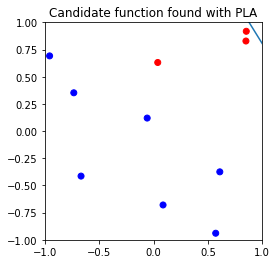

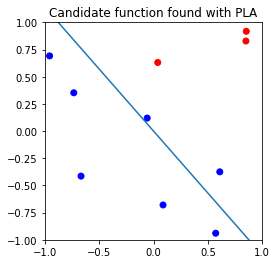

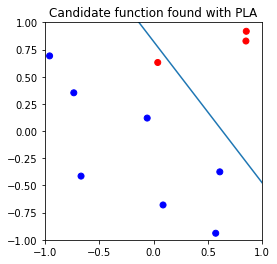

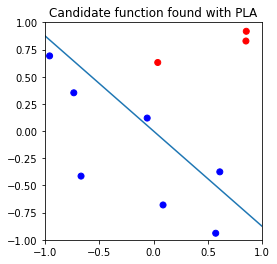

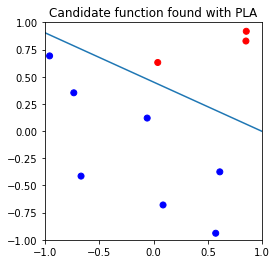

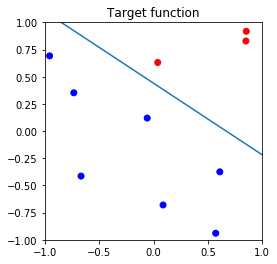

In [133]:
   
ds = Dataset(num_points=10)


pla = PLA(dataset=ds)
pla.fit(plot_iters=True)
ds.plot()


# 7
Take N = 10. How many iterations does it take on average for the PLA to
converge for N = 10 training points?

In [156]:
num_iters = []
n_correct_classified = 0
n_wrong_classified = 0
for i in range(2000):
    ds = Dataset(num_points=10)
    pla = PLA(dataset=ds)
    num_iters.append(pla.fit())
    for j in range(1000):
        p = random_point()
        if ds.target_func(p) == pla.candidate_func(p):
            n_correct_classified += 1
        else:
            n_wrong_classified += 1


print("Mean iters:", np.mean(num_iters))

print("P(wrong classification)", float(n_wrong_classified)/(n_correct_classified+n_wrong_classified))

Mean iters: 10.3585
P(wrong classification) 0.108792


**Answer: Around 10 iterations, so alternative B**

# 8

Which of the following is closest to P[f(x) 6= g(x)] for N = 10?

**Answer: Around 0.10, so alternative C**

# 9

Now, try N = 100. How many iterations does it take on average for the PLA
to converge for N = 100 training points? Pick the value closest to your results.

In [157]:
num_iters = []
n_correct_classified = 0
n_wrong_classified = 0
for i in range(1000):
    ds = Dataset(num_points=100)
    pla = PLA(dataset=ds)
    num_iters.append(pla.fit())
    for j in range(100):
        p = random_point()
        if ds.target_func(p) == pla.candidate_func(p):
            n_correct_classified += 1
        else:
            n_wrong_classified += 1


print("Mean iters:", np.mean(num_iters))

print("P(wrong classification)", float(n_wrong_classified)/(n_correct_classified+n_wrong_classified))

Mean iters: 115.903
P(wrong classification) 0.01293


**Answer: Around 100 iterations, so alternative B**

# 10

Which of the following is closest to P[f(x) 6= g(x)] for N = 100?

**Answer: Around 0.01, so alternative B**